# Medicare Enrollment EDA Project Objective: Clean and analyze Medicare enrollment data to identify key trends.

<div style="width: 100%; background-color: #DBC7BE; color: #0c2461; padding: 10px; border: 3px solid #0c2461; font-size: 15px;margin-bottom: 20px;border-radius:10px;">
    <h3 style="color: #0c2461;">Project Description</h3>
    The Medicare Monthly Enrollment data file contains the:
    <ul style="list-style-type: none; padding-left: 0;">
        <li><span style="margin-left: -10px;">&#8226;</span> Medicare monthly and yearly enrollee counts by geographic area (state/territory and county)</li> 
        <li><span style="margin-left: -10px;">&#8226;</span> The data is from calendar year 2013 to calendar year 2022</li>
        <li><span style="margin-left: -10px;">&#8226;</span> Data Source => https://www2.ccwdata.org/web/guest/home/</li>
    </ul>
    </span>
    <h4 style="color: #0c2461;">The file includes counts for the following:</h4>
    <ul style="list-style-type: none; padding-left: 0;">
        <li><span style="margin-left: -10px;">&#8226;</span> Total Medicare beneficiaries (Column Name: tot_benes)</li>
        <li><span style="margin-left: -10px;">&#8226;</span> Original Medicare beneficiaries (Column Name: Orgnl_Mdcr_Benes)</li>
        <li><span style="margin-left: -10px;">&#8226;</span> Medicare Advantage & other health plan beneficiaries (Column Name: MA_and_Oth_Benes)</li>
        <li><span style="margin-left: -10px;">&#8226;</span> Aged beneficiaries (Column Name: Aged_Tot_Benes)</li>
        <li><span style="margin-left: -10px;">&#8226;</span> Disabled beneficiaries (Column Name: Dsbld_Tot_Benes)</li>
        <li><span style="margin-left: -10px;">&#8226;</span> Total Part D (prescription drug) beneficiaries (Column Name: Prscrptn_Drug_Tot_Benes)</li>
        <li><span style="margin-left: -10px;">&#8226;</span> Stand-Alone Prescription Drug Plan beneficiaries (Column Name: Prscrptn_Drug_Tot_Benes)</li>
        <li><span style="margin-left: -10px;">&#8226;</span> Medicare Advantage Prescription Drug Plan beneficiaries (Column Name: PPrscrptn_Drug_PDP_Benes)</li>
        <li><span style="margin-left: -10px;">&#8226;</span> Part D Low-income subsidy beneficiaries (Column Name: Prscrptn_Drug_Deemed_Eligible_Full_LIS_Benes)</li>
    </ul>
The yearly Medicare enrollee counts are determined using a person-year methodology. For each 
calendar year, total person-year counts are determined by summing the total number of months that 
each beneficiary is enrolled during the year and dividing by 12 (Aggregate of 12 months in a year).
The monthly counts represent Medicare beneficiaries enrolled in the given month.
Yearly counts are aggregated in the source file.


<span>
</span> 
</div>

Steps :
* Reading source file into pandas dataframe
* Identifying irrelevant data and transforming the data.
* Explore data for missing values.
* Getting insights from the data to understand trends.

<h2 style="position: relative;">
    <span style="color: #6a89cc;">1.</span> 
    <span style="color: #0c2461;">Libraries and Warnings</span> 
    <br/>
</h2>

In [1]:
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from matplotlib import pyplot as pllt
import seaborn as sns

In [2]:
from plotly.offline import init_notebook_mode, iplot
from wordcloud import WordCloud
import plotly.graph_objs as go
from plotly import tools
import seaborn as sns


In [3]:
import warnings
warnings.filterwarnings("ignore")
import pandasql as ps
init_notebook_mode(connected=True)

<h2 style="position: relative;">
    <span style="color: #6a89cc;">2.</span> 
    <span style="color: #0c2461;">Explore the Medicare data set</span> 
    <br/>
</h2>

In [4]:
# Path of the file to read and read the data into the python pandas dataset
filepath = "/kaggle/input/Medicare Monthly Enrollment Data_August 2023.csv"
#data=pd.read_csv(filepath,index_col="YEAR", parse_dates=True, encoding='Windows-1252')
data=pd.read_csv(filepath, parse_dates=True, encoding='Windows-1252')
# importing the required library

In [5]:
data.head(10) #Reading the first 10 rows of the dataset

,YEAR,MONTH,BENE_GEO_LVL,BENE_STATE_ABRVTN,BENE_STATE_DESC,BENE_COUNTY_DESC,BENE_FIPS_CD,TOT_BENES,ORGNL_MDCR_BENES,MA_AND_OTH_BENES,...,A_B_TOT_BENES,A_B_ORGNL_MDCR_BENES,A_B_MA_AND_OTH_BENES,PRSCRPTN_DRUG_TOT_BENES,PRSCRPTN_DRUG_PDP_BENES,PRSCRPTN_DRUG_MAPD_BENES,PRSCRPTN_DRUG_DEEMED_ELIGIBLE_FULL_LIS_BENES,PRSCRPTN_DRUG_FULL_LIS_BENES,PRSCRPTN_DRUG_PARTIAL_LIS_BENES,PRSCRPTN_DRUG_NO_LIS_BENES
0,2013,Year,National,US,National,Total,,52425659,37613096,14812563,...,47620905,32831884,14789022,35679758,22661451,13018307,10000861,1030113.0,409204.0,24239580
1,2013,Year,State,AL,Alabama,Total,01,921477.0,711448.0,210029.0,...,857619.0,647647.0,209972.0,637247.0,437749.0,199498.0,205496.0,32790.0,11452.0,387510.0
2,2013,Year,County,AL,Alabama,Autauga,01001,9323.0,6484.0,2840.0,...,8708.0,5868.0,2840.0,6036.0,3268.0,2767.0,1839.0,296.0,105.0,3796.0
3,2013,Year,County,AL,Alabama,Baldwin,01003,41033.0,28775.0,12258.0,...,38559.0,26304.0,12255.0,27352.0,15593.0,11759.0,5276.0,867.0,379.0,20830.0
4,2013,Year,County,AL,Alabama,Barbour,01005,5847.0,5036.0,810.0,...,5456.0,4645.0,810.0,4170.0,3410.0,759.0,1783.0,304.0,73.0,2009.0
5,2013,Year,County,AL,Alabama,Bibb,01007,4574.0,2994.0,1580.0,...,4338.0,2759.0,1580.0,3359.0,1850.0,1509.0,1298.0,228.0,85.0,1749.0
6,2013,Year,County,AL,Alabama,Blount,01009,11183.0,6695.0,4488.0,...,10502.0,6014.0,4488.0,8479.0,4148.0,4331.0,2302.0,387.0,174.0,5616.0
7,2013,Year,County,AL,Alabama,Bullock,01011,1886.0,1434.0,452.0,...,1719.0,1267.0,452.0,1446.0,1006.0,440.0,738.0,133.0,23.0,552.0
8,2013,Year,County,AL,Alabama,Butler,01013,4576.0,4151.0,425.0,...,4336.0,3911.0,425.0,3428.0,3030.0,397.0,1394.0,226.0,70.0,1737.0
9,2013,Year,County,AL,Alabama,Calhoun,01015,25108.0,22073.0,3036.0,...,23187.0,20151.0,3036.0,15167.0,12254.0,2913.0,5648.0,899.0,299.0,8321.0


**Observation: Medicare data is categorized by Year, Month, National, State and County.**

In [6]:
row, col = data.shape
print("The Dataset have",row,"rows and",col,"columns.")

The Dataset have 460290 rows and 26 columns.


**Observation: Medicare dataset has 460290 rows and 26 columns.**

In [7]:
#Check the structure of the dataframe
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 460290 entries, 0 to 460289
Data columns (total 26 columns):
 #   Column                                        Non-Null Count   Dtype 
---  ------                                        --------------   ----- 
 0   YEAR                                          460290 non-null  int64 
 1   MONTH                                         460290 non-null  object
 2   BENE_GEO_LVL                                  460290 non-null  object
 3   BENE_STATE_ABRVTN                             460290 non-null  object
 4   BENE_STATE_DESC                               460290 non-null  object
 5   BENE_COUNTY_DESC                              460290 non-null  object
 6   BENE_FIPS_CD                                  460290 non-null  object
 7   TOT_BENES                                     460290 non-null  object
 8   ORGNL_MDCR_BENES                              460290 non-null  object
 9   MA_AND_OTH_BENES                              460290 non-nu

<h3 style="color: #0c2461;">Observation</h3>
<h5 style="color: #0c2461;">Most of the columns have object datatype. 
</h5>

In [8]:
data.describe(include = "object")

,MONTH,BENE_GEO_LVL,BENE_STATE_ABRVTN,BENE_STATE_DESC,BENE_COUNTY_DESC,BENE_FIPS_CD,TOT_BENES,ORGNL_MDCR_BENES,MA_AND_OTH_BENES,AGED_TOT_BENES,...,A_B_TOT_BENES,A_B_ORGNL_MDCR_BENES,A_B_MA_AND_OTH_BENES,PRSCRPTN_DRUG_TOT_BENES,PRSCRPTN_DRUG_PDP_BENES,PRSCRPTN_DRUG_MAPD_BENES,PRSCRPTN_DRUG_DEEMED_ELIGIBLE_FULL_LIS_BENES,PRSCRPTN_DRUG_FULL_LIS_BENES,PRSCRPTN_DRUG_PARTIAL_LIS_BENES,PRSCRPTN_DRUG_NO_LIS_BENES
count,460290,460290,460290,460290,460290,460290,460290,460290,460290,460290,...,460290,460290,460290,460290,460290,460290,460290,460290,460290,460290
unique,13,3,59,59,1931,3338,79910,64457,50211,74222,...,76732,60221,50152,68994,52106,47287,34782,11266,6931,59910
top,January,County,TX,Texas,Total,,*,*,*,*,...,*,*,*,*,*,*,*,*,*,*
freq,36690,452148,35328,35328,8004,276,7518,15439,15439,10483,...,7544,15444,15444,7656,22727,22727,9675,85130,85130,9675


<h3 style="color: #0c2461;">Observations</h3>
<h5 style="color: #0c2461;">For the object data type column, the values are stored as "*". This should be replaced by 0. Conversion is required from object type to Integer for all columns which have counts of beneficiaries (integer datatype)</h5>

In [9]:
# get all the unique values in the 'TOT_BENS' column
Total_ben = data['TOT_BENES'].unique()

# sort them alphabetically and then take a closer look
Total_ben.sort()
Total_ben

array(['*', '0.0', '100.0', ..., '99994.0', '99995.0', '99997.0'],
      dtype=object)

In [10]:
data.shape

(460290, 26)

<h3 style="color: #0c2461;">Observation</h3>
<h5 style="color: #0c2461;"> Since the value "*" exist in the dataset for the specific column and may produce inconsistent result,it is hence necessary to find out how many rows contains this value in the specific column. </h5>

In [11]:
data["TOT_BENES"].isin(["*"]).sum()

7518

<h5 style="color: #0c2461;"> This data can be explored further by adding these rows to another dataframe. </h5>

In [12]:
result_df=data[(data['TOT_BENES'] == "*")]

In [13]:
result_df.head(10)

,YEAR,MONTH,BENE_GEO_LVL,BENE_STATE_ABRVTN,BENE_STATE_DESC,BENE_COUNTY_DESC,BENE_FIPS_CD,TOT_BENES,ORGNL_MDCR_BENES,MA_AND_OTH_BENES,...,A_B_TOT_BENES,A_B_ORGNL_MDCR_BENES,A_B_MA_AND_OTH_BENES,PRSCRPTN_DRUG_TOT_BENES,PRSCRPTN_DRUG_PDP_BENES,PRSCRPTN_DRUG_MAPD_BENES,PRSCRPTN_DRUG_DEEMED_ELIGIBLE_FULL_LIS_BENES,PRSCRPTN_DRUG_FULL_LIS_BENES,PRSCRPTN_DRUG_PARTIAL_LIS_BENES,PRSCRPTN_DRUG_NO_LIS_BENES
69,2013,Year,County,AL,Alabama,Unknown,01999,*,*,*,...,*,*,*,*,*,*,*,*,*,*
100,2013,Year,County,AK,Alaska,Unknown,02999,*,*,*,...,*,*,*,*,*,*,*,*,*,*
117,2013,Year,County,AZ,Arizona,Unknown,04999,*,*,*,...,*,*,*,*,*,*,*,*,*,*
194,2013,Year,County,AR,Arkansas,Unknown,05999,*,*,*,...,*,*,*,*,*,*,*,*,*,*
254,2013,Year,County,CA,California,Unknown,06999,*,*,*,...,*,*,*,*,*,*,*,*,*,*
320,2013,Year,County,CO,Colorado,Unknown,08999,*,*,*,...,*,*,*,*,*,*,*,*,*,*
330,2013,Year,County,CT,Connecticut,Unknown,09999,*,*,*,...,*,*,*,*,*,*,*,*,*,*
335,2013,Year,County,DE,Delaware,Unknown,10999,*,*,*,...,*,*,*,*,*,*,*,*,*,*
338,2013,Year,County,DC,District of Columbia,Unknown,11999,*,*,*,...,*,*,*,*,*,*,*,*,*,*
407,2013,Year,County,FL,Florida,Unknown,12999,*,*,*,...,*,*,*,*,*,*,*,*,*,*


In [14]:
row, col = result_df.shape
print("The Dataset have",row,"rows and",col,"columns.")

The Dataset have 7518 rows and 26 columns.


**Few columns contain inconsistent data.**

In [15]:
data["DSBLD_TOT_BENES"].isin(["*"]).sum()

10483

In [16]:
data["ORGNL_MDCR_BENES"].isin(["*"]).sum()

15439

In [17]:
data["AGED_TOT_BENES"].isin(["*"]).sum()

10483

In [18]:
data["MA_AND_OTH_BENES"].isin(["*"]).sum()

15439

**The inconsistent data is transformed and cleaned in the following section. Now we should also look for any missing data (NULLS) in the columns of the data set.**

In [19]:
# get the number of missing data points per column
missing_values_count = data.isnull().sum()
# look at the # of missing points in the first ten columns
missing_values_count[0:26]

YEAR                                            0
MONTH                                           0
BENE_GEO_LVL                                    0
BENE_STATE_ABRVTN                               0
BENE_STATE_DESC                                 0
BENE_COUNTY_DESC                                0
BENE_FIPS_CD                                    0
TOT_BENES                                       0
ORGNL_MDCR_BENES                                0
MA_AND_OTH_BENES                                0
AGED_TOT_BENES                                  0
AGED_ESRD_BENES                                 0
AGED_NO_ESRD_BENES                              0
DSBLD_TOT_BENES                                 0
DSBLD_ESRD_AND_ESRD_ONLY_BENES                  0
DSBLD_NO_ESRD_BENES                             0
A_B_TOT_BENES                                   0
A_B_ORGNL_MDCR_BENES                            0
A_B_MA_AND_OTH_BENES                            0
PRSCRPTN_DRUG_TOT_BENES                         0


<h3 style="color: #0c2461;">Observations</h3>
<h5 style="color: #0c2461;">No missing values in the dataset.</h5>

<h2 style="position: relative;">
    <span style="color: #6a89cc;">3.</span> 
    <span style="color: #0c2461;">Cleaning the Dataset</span> 
    <br/>
</h2>


**To fix the data with "*" in the columns, change the the data type of columns from object to numeric. The data "*" is considered as bad data and is replaced by numeric value of zero.**

In [20]:
data['TOT_BENES'] = pd.to_numeric(data['TOT_BENES'], errors='coerce').fillna(0).astype(int) 

In [21]:
data["TOT_BENES"].isin(["*"]).sum()

0

In [22]:
# Data type conversion for other columns by filling 0 for irrelevant data that is not a number
data['DSBLD_TOT_BENES'] = pd.to_numeric(data['DSBLD_TOT_BENES'], errors='coerce').fillna(0).astype(int) 
data['AGED_TOT_BENES'] = pd.to_numeric(data['AGED_TOT_BENES'], errors='coerce').fillna(0).astype(int) 
data['ORGNL_MDCR_BENES'] = pd.to_numeric(data['ORGNL_MDCR_BENES'], errors='coerce').fillna(0).astype(int) 
data['MA_AND_OTH_BENES'] = pd.to_numeric(data['MA_AND_OTH_BENES'], errors='coerce').fillna(0).astype(int) 

**Data type converted for the specific columns from object type to Integer.**

In [23]:
#Check the structure of the dataframe
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 460290 entries, 0 to 460289
Data columns (total 26 columns):
 #   Column                                        Non-Null Count   Dtype 
---  ------                                        --------------   ----- 
 0   YEAR                                          460290 non-null  int64 
 1   MONTH                                         460290 non-null  object
 2   BENE_GEO_LVL                                  460290 non-null  object
 3   BENE_STATE_ABRVTN                             460290 non-null  object
 4   BENE_STATE_DESC                               460290 non-null  object
 5   BENE_COUNTY_DESC                              460290 non-null  object
 6   BENE_FIPS_CD                                  460290 non-null  object
 7   TOT_BENES                                     460290 non-null  int64 
 8   ORGNL_MDCR_BENES                              460290 non-null  int64 
 9   MA_AND_OTH_BENES                              460290 non-nu

In [24]:
# Transform the data 
data = data[(data['TOT_BENES'] != 0) & (data['AGED_TOT_BENES'] != 0) & (data['DSBLD_TOT_BENES'] != 0) & (data['PRSCRPTN_DRUG_TOT_BENES'] != 0)]
#Take only necessary columns
data= pd.DataFrame(data,columns = ['YEAR','MONTH','BENE_GEO_LVL','BENE_STATE_ABRVTN','BENE_COUNTY_DESC', 'TOT_BENES','AGED_TOT_BENES', 'DSBLD_TOT_BENES','PRSCRPTN_DRUG_TOT_BENES']) 

<h2 style="position: relative;">
    <span style="color: #6a89cc;">4.</span> 
    <span style="color: #0c2461;">Data Visualization</span> 
    <br/>
</h2>

**1. Trend for total beneficiaries by Year**

In [25]:
def round_to_million(df, column):
    return df[column].round(-6) / 1000000

In [26]:
# This code creates temporary dataframes (filtered data)
df_yearly_national = data
df_yearly_national = data[(data['BENE_COUNTY_DESC'] == 'Total')]
df_yearly_national= df_yearly_national[(df_yearly_national['BENE_GEO_LVL'] == 'National')]
df_yearly_national = df_yearly_national[(df_yearly_national['MONTH'] == 'Year')]
df_yearly_national.groupby('YEAR')['TOT_BENES'].sum()
#Take only necessary columns
df_year_temp1= pd.DataFrame(df_yearly_national,columns = ['YEAR', 'TOT_BENES']).sort_values('TOT_BENES', ascending=False)
df_year_temp1.reset_index(drop=True, inplace=True)
#df_year.style.hide(axis='index')
df_year_temp2 = ps.sqldf("select Year, tot_benes from df_year_temp1")
df_year_temp2['TotalBeneficiaries'] = round_to_million(df_year_temp2, 'TOT_BENES')
#df_state1 = df_state1.to_string(formatters={'TotalBeneficiaries': '{:,.0f}M'.format})
pd.options.display.float_format = '{:,.0f}M'.format

In [27]:
selected_columns = df_year_temp2.iloc[:, [0, 2]] 
print(selected_columns)

   YEAR  TotalBeneficiaries
0  2022                 65M
1  2021                 64M
2  2020                 63M
3  2019                 62M
4  2018                 60M
5  2017                 58M
6  2016                 57M
7  2015                 55M
8  2014                 54M
9  2013                 52M


**Observation: This shows that total beneficiaries have increased significantly from year 2013 to year 2022.**

**2. For the current year (Considering 2022 as the current year) , List top 5 states with the highest Total beneficiary count****

In [28]:
options = [2022]  
data_flt = data[(data['YEAR'].isin(options))]
#data_flt = data_flt[(data_flt['BENE_COUNTY_DESC'] == 'Total')]
data_flt= data_flt[(data_flt['BENE_GEO_LVL'] == 'State')]
data_flt = data_flt[(data_flt['MONTH'] == 'Year')]
#q1=''
df_state = ps.sqldf("select tot_benes,BENE_STATE_ABRVTN as state from data_flt order by tot_benes desc ")
#print(ps.sqldf(q1, locals()))
df_state.head(5)


,TOT_BENES,state
0,6626725,CA
1,4920095,FL
2,4508562,TX
3,3759903,NY
4,2845419,PA


**2b. For the current year (Considering 2022 as the current year) , List top 5 states with the lowest Total beneficiary count****

In [29]:
#q1=''
df_state_low = ps.sqldf("select tot_benes,BENE_STATE_ABRVTN as state from data_flt order by tot_benes asc")
#print(ps.sqldf(q1, locals()))
df_state_low.head(5)


,TOT_BENES,state
0,2958,MP
1,4862,AS
2,18697,GU
3,20478,VI
4,94560,DC


**3. For the current year (Considering 2022 as the current year) , List top 5 states with the highest disability count****

In [30]:
# Top 5 states with highest disabled beneficiaries 
df_dsbld = ps.sqldf("select state as 'State', dsbld_tot_benes as 'Total Beneficiaries(Disabled)' from (select dsbld_tot_benes, bene_state_abrvtn as state, RANK() OVER(order by dsbld_tot_benes desc) as RN from data_flt  order by RN) as temp where RN < 6")
df_dsbld.head(5)

,State,Total Beneficiaries(Disabled)
0,CA,572698
1,TX,520387
2,FL,495622
3,NY,446985
4,PA,353378


**4. Visualization (A choropleth map ) for Total beneficiaries by states**

In [31]:
#scl = [[0.0, 'rgb(248,255,206)'],[0.2, 'rgb(203,255,205)'],[0.4, 'rgb(155,255,164)'], [0.6, 'rgb(79,255,178)'],[0.8, 'rgb(15,183,132)'], [1, '#008059']]
color_continuous_scale=[[0, 'rgb(240,240,240)'],[0.005, 'rgb(13,136,198)'],[0.1, 'rgb(191,247,202)'],[0.20, 'rgb(4,145,32)'],[1, 'rgb(227,26,28,0.5)']]
data = [ dict(
        type='choropleth',
        colorscale = color_continuous_scale,
        autocolorscale = False,
        locations = df_state.state,
        z = df_state.TOT_BENES,
        locationmode = 'USA-states',
        text = df_state.state,
        marker = dict(
            line = dict (
                color = 'rgb(255,255,255)',
                width = 2
            ) ),
        colorbar = dict(
            title = "Top States by Total beneficiaries")
        )
       ]

layout = dict(
        title = 'Top States by Total beneficiaries - year 2022',
        geo = dict(
            scope='usa',
            projection=dict( type='albers usa' ),
            showlakes = True,
            lakecolor = 'rgb(255, 255, 255)'),
             )
    
fig = dict( data=data, layout=layout )
iplot( fig, filename='d3-cloropleth-map' )

In [32]:
#t=This dataset has only yearly counts for geographical level as National
row, col = df_yearly_national.shape
print("The Dataset have",row,"rows and",col,"columns.")

The Dataset have 10 rows and 9 columns.


In [33]:
df_yearly_national.head(10)

,YEAR,MONTH,BENE_GEO_LVL,BENE_STATE_ABRVTN,BENE_COUNTY_DESC,TOT_BENES,AGED_TOT_BENES,DSBLD_TOT_BENES,PRSCRPTN_DRUG_TOT_BENES
0,2013,Year,National,US,Total,52425659,43761388,8664271,35679758
43355,2014,Year,National,US,Total,54013038,45216665,8796373,37720840
86710,2015,Year,National,US,Total,55496222,46630952,8865269,39505335
130065,2016,Year,National,US,Total,56981183,48143217,8837966,41203627
173420,2017,Year,National,US,Total,58457244,49678033,8779211,42728443
216775,2018,Year,National,US,Total,59989883,51303898,8685985,44249461
260130,2019,Year,National,US,Total,61514510,52991455,8523055,45827091
303498,2020,Year,National,US,Total,62840267,54531919,8308348,47413121
346866,2021,Year,National,US,Total,63892626,55851321,8041304,48818849
390234,2022,Year,National,US,Total,65116503,57362936,7753567,50295753


In [34]:
numerical_columns = list(df_yearly_national.loc[:,['TOT_BENES', 'AGED_TOT_BENES', 'DSBLD_TOT_BENES','PRSCRPTN_DRUG_TOT_BENES']])

In [35]:
#Seaborn settings for visualizations!
rc = {
    "axes.facecolor": "#f7f9fc",
    "figure.facecolor": "#f7f9fc",
    "axes.edgecolor": "#000000",
    "grid.color": "#EBEBE7",
    "font.family": "serif",
    "axes.labelcolor": "#000000",
    "xtick.color": "#000000",
    "ytick.color": "#000000",
    "grid.alpha": 0.4
}

default_palette = 'YlOrRd'

sns.set(rc=rc)
pd.set_option('display.max_columns',35)
pd.options.display.float_format = '{:,.2f}'.format

<Axes: xlabel='YEAR', ylabel='TOT_BENES'>

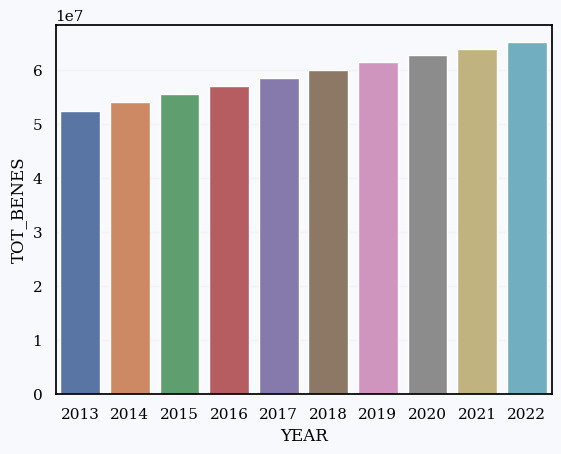

In [36]:
df_yearly_national['YEAR'] = pd.to_numeric(df_yearly_national['YEAR']).astype(int)
#sns.barplot(x=df3['YEAR'], y=df3['TOT_BENES'])
sns.barplot(x=df_yearly_national['YEAR'], y=df_yearly_national['TOT_BENES'])